##  YourSRealEstate - Price Predictor

In [1]:
import pandas as pd

In [2]:
housing = pd.read_csv("dataSet.csv")

In [3]:
housing.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [4]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 507 entries, 0 to 506
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     507 non-null    float64
 1   ZN       507 non-null    float64
 2   INDUS    507 non-null    float64
 3   CHAS     507 non-null    float64
 4   NOX      507 non-null    float64
 5   RM       503 non-null    float64
 6   AGE      507 non-null    float64
 7   DIS      507 non-null    float64
 8   RAD      507 non-null    int64  
 9   TAX      507 non-null    float64
 10  PTRATIO  507 non-null    float64
 11  B        507 non-null    float64
 12  LSTAT    507 non-null    float64
 13  MEDV     507 non-null    float64
dtypes: float64(13), int64(1)
memory usage: 55.6 KB


In [5]:
housing['CHAS'].value_counts()

0.000    418
1.000     35
0.693      8
0.740      7
0.671      6
0.700      6
0.679      6
0.597      5
0.614      4
0.668      2
0.659      2
0.718      2
0.584      2
0.580      2
0.631      1
0.713      1
Name: CHAS, dtype: int64

In [6]:
housing.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,507.000000,507.000000,507.000000,507.000000,507.000000,503.000000,507.000000,507.000000,507.000000,507.000000,507.000000,507.000000,507.000000,507.000000
mean,1.266786,13.269034,9.210533,0.140487,1.100134,15.719718,58.788161,6.166073,77.911243,339.186982,42.572347,332.917554,11.530592,23.029389
std,2.397449,23.033480,7.163564,0.312519,1.645529,27.298001,33.085824,6.472083,203.369730,180.515490,87.503919,125.230928,6.061113,9.150454
min,0.000000,0.000000,0.000000,0.000000,0.385000,3.561000,1.137000,1.129600,1.000000,20.200000,2.600000,0.320000,1.730000,6.300000
25%,0.048755,0.000000,3.440000,0.000000,0.449000,5.956000,32.000000,2.431350,4.000000,254.000000,17.000000,365.380000,6.885000,17.200000
50%,0.144550,0.000000,6.960000,0.000000,0.538000,6.317000,65.300000,3.917500,5.000000,307.000000,18.900000,390.680000,10.360000,21.200000
75%,0.813985,18.100000,18.100000,0.000000,0.647000,6.951000,89.950000,6.328050,24.000000,403.000000,20.200000,395.620000,15.010000,25.000000
max,9.966540,100.000000,27.740000,1.000000,7.313000,100.000000,100.000000,24.000000,666.000000,711.000000,396.900000,396.900000,34.410000,50.000000


In [7]:
%matplotlib inline

In [8]:
import matplotlib.pyplot as plt

array([[<AxesSubplot:title={'center':'CRIM'}>,
        <AxesSubplot:title={'center':'ZN'}>,
        <AxesSubplot:title={'center':'INDUS'}>,
        <AxesSubplot:title={'center':'CHAS'}>],
       [<AxesSubplot:title={'center':'NOX'}>,
        <AxesSubplot:title={'center':'RM'}>,
        <AxesSubplot:title={'center':'AGE'}>,
        <AxesSubplot:title={'center':'DIS'}>],
       [<AxesSubplot:title={'center':'RAD'}>,
        <AxesSubplot:title={'center':'TAX'}>,
        <AxesSubplot:title={'center':'PTRATIO'}>,
        <AxesSubplot:title={'center':'B'}>],
       [<AxesSubplot:title={'center':'LSTAT'}>,
        <AxesSubplot:title={'center':'MEDV'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

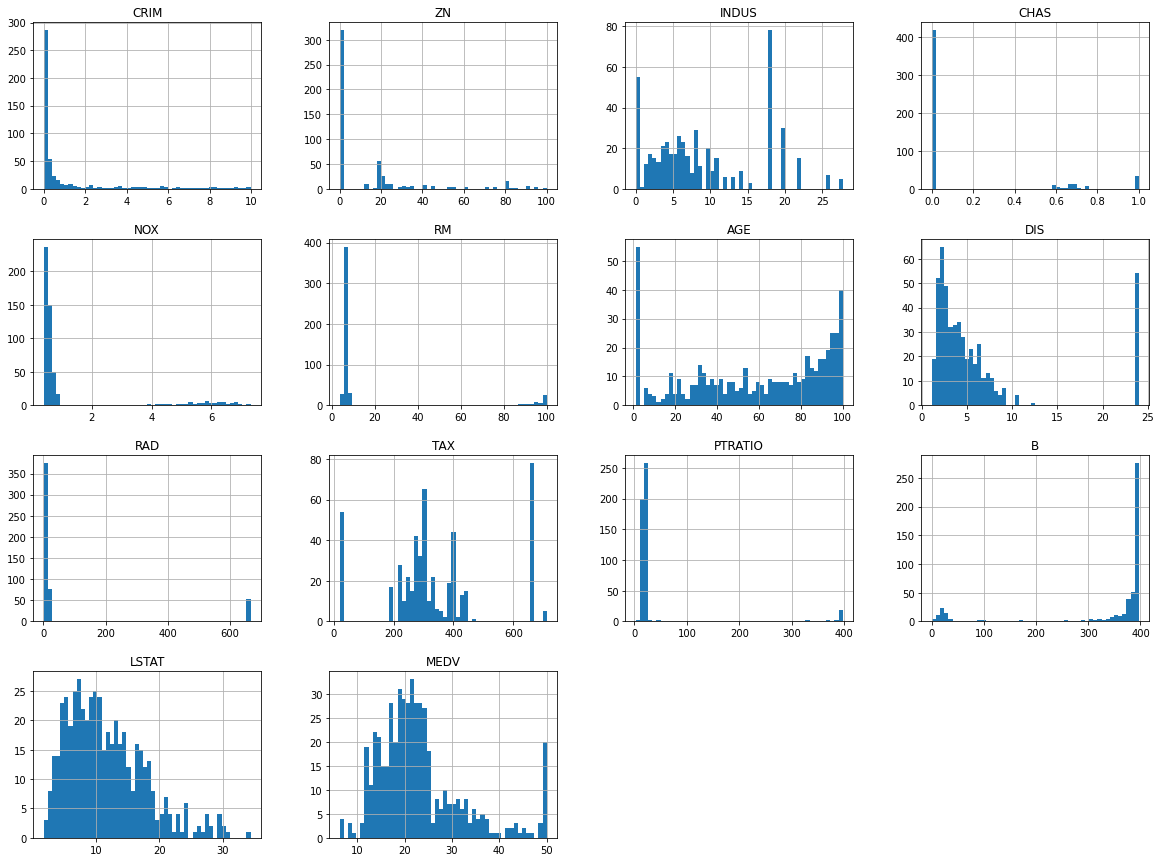

In [9]:
housing.hist(bins=50, figsize=(20,15))

## Train-Test Spliting

In [10]:
import numpy as np
def split_train_test(data,test_ratio):
    np.random.seed(42)
    shuffled = np.random.permutation(len(data))
    test_set_size = int(len(data) * test_ratio)
    test_indices = shuffled[:test_set_size]
    train_indices = shuffled[test_set_size:]
    return data.iloc[train_indices], data.iloc[test_indices]

In [11]:
train_set, test_set = split_train_test(housing, 0.2)

In [12]:
print(f"Rows in train set: {len(train_set)}\n Rows in test set: {len(test_set)}\n")

Rows in train set: 406
 Rows in test set: 101



In [13]:
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(housing,test_size=0.2,random_state=42)
print(f"Rows in train set: {len(train_set)}\n Rows in test set: {len(test_set)}\n")

Rows in train set: 405
 Rows in test set: 102



In [14]:
#usally used StratifiedShuffleSplit but in my case there is a problem as some value is less than 1 so i use only shufflesplit
from sklearn.model_selection import ShuffleSplit
split = ShuffleSplit(n_splits =1, test_size = 0.2, random_state=42)
for train_index, test_index in split.split(housing, housing['CHAS']):
    strat_train_set = housing.loc[train_index]
    strat_test_set = housing.loc[test_index]

In [15]:
 strat_train_set

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
444,0.00000,18.1,0.00,0.74,5.8540,96.600,1.8956,24.0000,666,20.2,240.52,23.79,10.80,15.4
15,0.62739,0.0,8.14,0.00,0.5380,5.834,56.5000,4.4986,4,307.0,21.00,395.62,8.47,19.9
332,0.03466,35.0,6.06,0.00,0.4379,6.031,23.3000,6.6407,1,304.0,16.90,362.25,7.83,19.4
390,6.96215,0.0,18.10,0.00,0.7000,5.713,97.0000,1.9265,24,666.0,20.20,394.43,17.11,15.1
19,0.72580,0.0,8.14,0.00,0.5380,5.727,69.5000,3.7965,4,307.0,21.00,390.95,11.28,18.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106,0.17120,0.0,8.56,0.00,0.5200,5.836,91.9000,2.2110,5,384.0,20.90,395.67,18.66,19.5
270,0.29916,20.0,6.96,0.00,0.4640,5.856,42.1000,4.4290,3,223.0,18.60,388.65,13.00,21.1
348,0.01501,80.0,2.01,0.00,0.4350,6.635,29.7000,8.3440,4,280.0,17.00,390.94,5.99,24.5
435,0.00000,18.1,0.00,0.74,6.6290,94.600,2.1247,24.0000,666,20.2,109.85,23.27,13.40,14.3


In [16]:
strat_test_set

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
173,0.09178,0.0,4.05,0.000,0.510,6.416,84.1000,2.6463,5,296.0,16.60,395.50,9.04,23.6
274,0.05644,40.0,6.41,1.000,0.447,6.758,32.9000,4.0776,4,254.0,17.60,396.90,3.53,32.4
492,0.11132,0.0,27.74,0.000,0.609,5.983,83.5000,2.1099,4,711.0,20.10,396.90,13.35,20.1
72,0.09164,0.0,10.81,0.000,0.413,6.065,7.8000,5.2873,4,305.0,19.20,390.91,5.52,22.8
453,8.24809,0.0,18.10,0.000,0.713,7.393,99.3000,2.4527,24,666.0,20.20,375.87,16.74,17.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
482,5.73116,0.0,18.10,0.000,0.532,7.061,77.0000,3.4106,24,666.0,20.20,395.28,7.01,25.0
437,0.00000,18.1,0.00,0.740,6.152,100.000,1.9142,24.0000,666,20.2,9.32,26.45,8.70,14.3
412,0.00000,18.1,0.00,0.597,4.628,100.000,1.5539,24.0000,666,20.2,28.79,34.37,17.90,17.2
86,0.05188,0.0,4.49,0.000,0.449,6.015,45.1000,4.4272,3,247.0,18.50,395.99,12.86,22.5


In [17]:
strat_test_set.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000
mean,1.592804,12.146078,10.162647,0.115539,1.015521,14.017451,59.664440,5.707459,66.911765,366.752941,34.586078,339.568137,12.383922,22.194118
std,2.837893,23.928878,7.163544,0.288058,1.571525,25.411868,32.308206,6.026669,187.464590,194.190779,68.637789,119.409171,6.105028,8.609790
min,0.000000,0.000000,0.000000,0.000000,0.392000,3.561000,1.316300,1.169100,1.000000,20.200000,9.320000,3.500000,2.880000,6.300000
25%,0.050912,0.000000,4.415000,0.000000,0.448250,5.919500,33.050000,2.459175,4.000000,257.250000,18.325000,367.307500,7.282500,17.250000
50%,0.137505,0.000000,8.350000,0.000000,0.532000,6.236000,67.800000,3.927000,5.000000,307.000000,19.200000,391.710000,12.115000,20.600000
75%,1.146493,18.100000,18.100000,0.000000,0.629250,6.589500,90.000000,5.276650,24.000000,437.000000,20.200000,396.900000,17.060000,24.175000
max,9.916550,95.000000,27.740000,1.000000,7.313000,100.000000,100.000000,24.000000,666.000000,711.000000,396.900000,396.900000,29.970000,50.000000


In [18]:
strat_test_set['CHAS'].value_counts()

0.000    87
1.000     6
0.614     2
0.597     2
0.679     1
0.671     1
0.580     1
0.693     1
0.740     1
Name: CHAS, dtype: int64

In [19]:
# 87/6

In [20]:
housing = strat_train_set.copy()

## looking for Correlations

In [21]:
corr_matrix = housing.corr()

In [22]:
corr_matrix['MEDV'].sort_values(ascending=False)

MEDV       1.000000
B          0.339739
ZN         0.227254
CHAS      -0.027686
AGE       -0.036385
TAX       -0.062546
CRIM      -0.191999
PTRATIO   -0.197084
INDUS     -0.203179
DIS       -0.210418
RM        -0.237921
RAD       -0.259971
NOX       -0.279607
LSTAT     -0.585628
Name: MEDV, dtype: float64

array([[<AxesSubplot:xlabel='MEDV', ylabel='MEDV'>,
        <AxesSubplot:xlabel='RM', ylabel='MEDV'>,
        <AxesSubplot:xlabel='ZN', ylabel='MEDV'>,
        <AxesSubplot:xlabel='LSTAT', ylabel='MEDV'>],
       [<AxesSubplot:xlabel='MEDV', ylabel='RM'>,
        <AxesSubplot:xlabel='RM', ylabel='RM'>,
        <AxesSubplot:xlabel='ZN', ylabel='RM'>,
        <AxesSubplot:xlabel='LSTAT', ylabel='RM'>],
       [<AxesSubplot:xlabel='MEDV', ylabel='ZN'>,
        <AxesSubplot:xlabel='RM', ylabel='ZN'>,
        <AxesSubplot:xlabel='ZN', ylabel='ZN'>,
        <AxesSubplot:xlabel='LSTAT', ylabel='ZN'>],
       [<AxesSubplot:xlabel='MEDV', ylabel='LSTAT'>,
        <AxesSubplot:xlabel='RM', ylabel='LSTAT'>,
        <AxesSubplot:xlabel='ZN', ylabel='LSTAT'>,
        <AxesSubplot:xlabel='LSTAT', ylabel='LSTAT'>]], dtype=object)

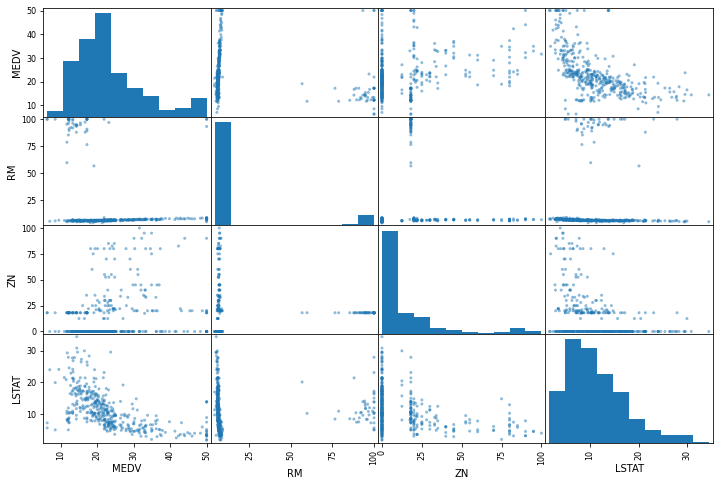

In [23]:
from pandas.plotting import scatter_matrix
attribute = ['MEDV','RM','ZN', 'LSTAT']
scatter_matrix(housing[attribute], figsize=(12,8))

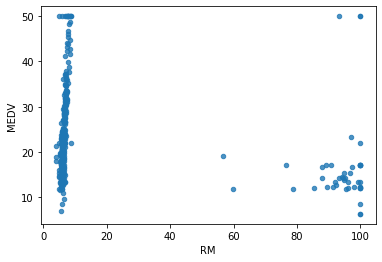

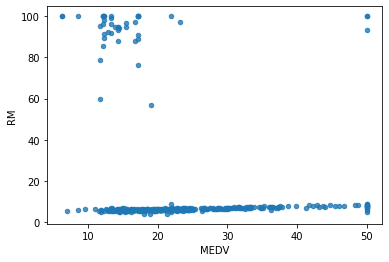

In [24]:
housing.plot(kind="scatter", x="RM", y="MEDV", alpha=0.8)
b= housing.plot(kind="scatter", x="MEDV", y="RM", alpha=0.8)

## Trying out Attribute Combination

In [25]:
housing['TAXRM'] = housing['TAX'] / housing['RM']

In [26]:
housing['TAXRM']

444      0.209110
15      52.622557
332     50.406234
390    116.576230
19      53.605727
          ...    
106     65.798492
270     38.080601
348     42.200452
435      0.213531
102     59.953162
Name: TAXRM, Length: 405, dtype: float64

In [27]:
housing.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV,TAXRM
444,0.00000,18.1,0.00,0.74,5.8540,96.600,1.8956,24.0000,666,20.2,240.52,23.79,10.80,15.4,0.209110
15,0.62739,0.0,8.14,0.00,0.5380,5.834,56.5000,4.4986,4,307.0,21.00,395.62,8.47,19.9,52.622557
332,0.03466,35.0,6.06,0.00,0.4379,6.031,23.3000,6.6407,1,304.0,16.90,362.25,7.83,19.4,50.406234
390,6.96215,0.0,18.10,0.00,0.7000,5.713,97.0000,1.9265,24,666.0,20.20,394.43,17.11,15.1,116.576230
19,0.72580,0.0,8.14,0.00,0.5380,5.727,69.5000,3.7965,4,307.0,21.00,390.95,11.28,18.2,53.605727


In [28]:
corr_matrix = housing.corr()
corr_matrix['MEDV'].sort_values(ascending=False)

MEDV       1.000000
B          0.339739
ZN         0.227254
CHAS      -0.027686
AGE       -0.036385
TAX       -0.062546
TAXRM     -0.159228
CRIM      -0.191999
PTRATIO   -0.197084
INDUS     -0.203179
DIS       -0.210418
RM        -0.237921
RAD       -0.259971
NOX       -0.279607
LSTAT     -0.585628
Name: MEDV, dtype: float64

<AxesSubplot:xlabel='TAXRM', ylabel='MEDV'>

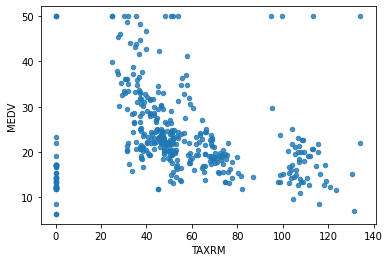

In [29]:
housing.plot(kind="scatter", x="TAXRM", y="MEDV", alpha=0.8)

In [30]:
housing = strat_train_set.drop("MEDV", axis=1)
housing_lables = strat_train_set["MEDV"].copy()

In [31]:
housing_lables

444    15.4
15     19.9
332    19.4
390    15.1
19     18.2
       ... 
106    19.5
270    21.1
348    24.5
435    14.3
102    18.6
Name: MEDV, Length: 405, dtype: float64

## MIssig Attribute

In [32]:
a = housing.dropna(subset=['RM']) #get rid of missing data point
a.shape

(401, 13)

In [33]:
b = housing.drop("RM", axis=1) #get rid of whole attribute
b.shape
#original data frame remain unchanged

(405, 12)

In [34]:
median = housing["RM"].median()

In [35]:
housing["RM"].fillna(median) #set the value to some value(0,mean or median)

444    96.600
15      5.834
332     6.031
390     5.713
19      5.727
        ...  
106     5.836
270     5.856
348     6.635
435    94.600
102     6.405
Name: RM, Length: 405, dtype: float64

In [36]:
housing.shape

(405, 13)

In [37]:
housing.describe() #before starting filling missing attribute

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,405.000000,405.000000,405.000000,405.000000,405.000000,401.000000,405.000000,405.000000,405.000000,405.000000,405.000000,405.000000,405.000000
mean,1.184677,13.551852,8.970741,0.146770,1.121443,16.152713,58.567469,6.281575,80.681481,332.244444,44.583704,331.242593,11.315679
std,2.269786,22.824183,7.152428,0.318411,1.664850,27.770847,33.314434,6.581553,207.310034,176.480243,91.608829,126.742588,6.038569
min,0.000000,0.000000,0.000000,0.000000,0.385000,4.004000,1.137000,1.129600,1.000000,20.200000,2.600000,0.320000,1.730000
25%,0.047410,0.000000,3.410000,0.000000,0.453000,5.965000,31.100000,2.425900,4.000000,252.000000,16.800000,364.310000,6.680000
50%,0.148660,0.000000,6.910000,0.000000,0.538000,6.348000,64.700000,3.917500,5.000000,307.000000,18.600000,390.430000,10.210000
75%,0.785700,20.000000,18.100000,0.000000,0.647000,6.998000,89.800000,6.465400,8.000000,403.000000,20.200000,395.430000,14.700000
max,9.966540,100.000000,27.740000,1.000000,6.968000,100.000000,100.000000,24.000000,666.000000,711.000000,396.900000,396.900000,34.410000


In [38]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy="median")
imputer.fit(housing)

SimpleImputer(strategy='median')

In [39]:
imputer.statistics_

array([1.4866e-01, 0.0000e+00, 6.9100e+00, 0.0000e+00, 5.3800e-01,
       6.3480e+00, 6.4700e+01, 3.9175e+00, 5.0000e+00, 3.0700e+02,
       1.8600e+01, 3.9043e+02, 1.0210e+01])

In [40]:
imputer.statistics_.shape

(13,)

In [41]:
x = imputer.transform(housing)

In [42]:
housing_tr = pd.DataFrame(x, columns= housing.columns)

In [43]:
housing_tr.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,405.000000,405.000000,405.000000,405.000000,405.000000,405.000000,405.000000,405.000000,405.000000,405.000000,405.000000,405.000000,405.000000
mean,1.184677,13.551852,8.970741,0.146770,1.121443,16.055877,58.567469,6.281575,80.681481,332.244444,44.583704,331.242593,11.315679
std,2.269786,22.824183,7.152428,0.318411,1.664850,27.650073,33.314434,6.581553,207.310034,176.480243,91.608829,126.742588,6.038569
min,0.000000,0.000000,0.000000,0.000000,0.385000,4.004000,1.137000,1.129600,1.000000,20.200000,2.600000,0.320000,1.730000
25%,0.047410,0.000000,3.410000,0.000000,0.453000,5.966000,31.100000,2.425900,4.000000,252.000000,16.800000,364.310000,6.680000
50%,0.148660,0.000000,6.910000,0.000000,0.538000,6.348000,64.700000,3.917500,5.000000,307.000000,18.600000,390.430000,10.210000
75%,0.785700,20.000000,18.100000,0.000000,0.647000,6.982000,89.800000,6.465400,8.000000,403.000000,20.200000,395.430000,14.700000
max,9.966540,100.000000,27.740000,1.000000,6.968000,100.000000,100.000000,24.000000,666.000000,711.000000,396.900000,396.900000,34.410000


## Scikit-learn Design

primary , three type of object
1. Estimators - it estimetes some parameter based on a dataset eg- imputer 
its has a fit method and transform method 
fit method -  fits the dataset calculate internal parameters

2. transformers
3. predictor

## Feature Scaling

primarly, two types of feature scaling methods:
1. Min-max scalinf(Normalization)
    (value-min)/(max-min)
2. Standardization
    (value - min)/std

## Creating a Pipeline

In [44]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
my_pipeline = Pipeline([
    ('imputer' , SimpleImputer(strategy = "median")),
    ("std_scaler", StandardScaler()),
    
])


In [45]:
housing_num_tr = my_pipeline.fit_transform(housing)

In [46]:
housing_num_tr

array([[-0.52257909,  0.19951529, -1.2557745 , ...,  2.14148181,
        -2.42880372, -0.08550318],
       [-0.24582785, -0.59448408, -0.11629174, ..., -0.25775762,
         0.50856649, -0.47183345],
       [-0.50729004,  0.94087382, -0.40746178, ..., -0.30256848,
         0.24495128, -0.57794992],
       ...,
       [-0.51595795,  2.9149054 , -0.97440345, ..., -0.30147554,
         0.47159558, -0.88303477],
       [-0.52257909,  0.19951529, -1.2557745 , ...,  0.71332667,
        -2.4329116 ,  0.34559497],
       [-0.42166958, -0.59448408, -0.05749779, ..., -0.25885056,
        -2.05743569, -0.11369037]])

In [47]:
housing_num_tr.shape

(405, 13)

## Selecting a desired model for yourSReal estate

In [48]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
#model = LinearRegression()
#model = DecisionTreeRegressor()
model = RandomForestRegressor()
model.fit(housing_num_tr, housing_lables)

RandomForestRegressor()

In [49]:
some_data = housing.iloc[:5]

In [50]:
some_lables = housing_lables.iloc[:5]

In [51]:
prepared_data = my_pipeline.transform(some_data)

In [52]:
prepared_data

array([[-0.52257909,  0.19951529, -1.2557745 ,  1.86539887,  2.84614798,
         2.91658349, -1.7032246 ,  2.695464  ,  2.82688909, -1.77034207,
         2.14148181, -2.42880372, -0.08550318],
       [-0.24582785, -0.59448408, -0.11629174, -0.46151654, -0.35088147,
        -0.3701444 , -0.06213601, -0.27124001, -0.37034544, -0.14322095,
        -0.25775762,  0.50856649, -0.47183345],
       [-0.50729004,  0.94087382, -0.40746178, -0.46151654, -0.41108137,
        -0.36301083, -1.05993365,  0.05463283, -0.38483442, -0.16024105,
        -0.30256848,  0.24495128, -0.57794992],
       [ 2.54853083, -0.59448408,  1.27796481, -0.46151654, -0.25345507,
        -0.37452593,  1.15505689, -0.66252779, -0.27375225,  1.89351713,
        -0.2665012 ,  0.49916577,  0.96073888],
       [-0.20241771, -0.59448408, -0.11629174, -0.46151654, -0.35088147,
        -0.37401898,  0.32856788, -0.3780489 , -0.37034544, -0.14322095,
        -0.25775762,  0.47167458, -0.00591583]])

In [53]:
model.predict(prepared_data)

array([15.5  , 19.96 , 20.114, 14.889, 18.658])

In [54]:
list(some_lables)

[15.4, 19.9, 19.4, 15.1, 18.2]

## evaluating the model 

In [55]:
from sklearn.metrics import mean_squared_error
housing_prediction = model.predict(housing_num_tr)
mse = mean_squared_error(housing_lables,housing_prediction)
rmse = np.sqrt(mse)

In [56]:
rmse

1.641839847229507

## using better evaluation technique - Cross Validation

In [57]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(model, housing_num_tr,housing_lables, scoring="neg_mean_squared_error", cv=10)
rmse_scores = np.sqrt(-scores)

In [58]:
rmse_scores

array([2.90374968, 5.8966842 , 2.84516889, 4.35063294, 3.48608554,
       6.63760252, 3.57512057, 2.85325049, 2.6900267 , 5.91337619])

In [59]:
def print_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standrad_deviation:", scores.std())
    

In [60]:
print_scores(rmse_scores)

Scores: [2.90374968 5.8966842  2.84516889 4.35063294 3.48608554 6.63760252
 3.57512057 2.85325049 2.6900267  5.91337619]
Mean: 4.115169771781555
Standrad_deviation: 1.4218566697218185


## saving the mode

In [61]:
from joblib import dump,load
dump(model,'yoursReal.joblib')

['yoursReal.joblib']

## Testing the model on test data

In [62]:
X_test = strat_test_set.drop("MEDV", axis=1)
Y_test = strat_test_set["MEDV"].copy()
X_test_prepared = my_pipeline.transform(X_test)
final_predictions = model.predict(X_test_prepared)
final_mse = mean_squared_error(Y_test, final_predictions)
final_rmse = np.sqrt(final_mse)
print(final_predictions, list(Y_test))

[23.122 31.922 19.914 23.823 16.403 21.48  18.821 15.252 19.911 21.789
 20.121 19.598 12.19  21.729 19.965 16.976 19.093 17.404 44.973 14.481
 24.88  23.863 15.827 16.441 16.61  15.398 21.421 14.636 20.098 21.735
 20.443 23.239 25.968 19.629 16.195 15.478 36.772 19.261 21.342 24.264
 20.615 29.144 45.485 19.294 22.558 16.294 15.473 24.618 20.679 27.193
 21.458 35.002 16.884 25.185 46.337 19.372 16.5   33.665 22.57  19.624
 19.583 34.196 33.679 17.941 26.155 18.211 14.272 23.255 29.43  15.079
 20.158 15.369 15.412 21.057 22.202 13.73  20.047 45.641 12.374 11.755
 21.301 17.324 20.338 16.399 20.322 26.787 19.355 23.152 23.354 17.615
 22.193 12.529 18.164 19.205 20.416 18.871 35.995 28.136 16.728 16.528
 20.494 24.272] [23.6, 32.4, 20.1, 22.8, 17.8, 20.0, 17.8, 14.0, 23.2, 22.4, 21.5, 18.9, 17.2, 21.2, 18.5, 13.8, 18.8, 11.7, 50.0, 13.0, 25.2, 29.1, 12.7, 20.6, 14.2, 14.9, 20.3, 14.1, 21.7, 21.2, 23.1, 23.8, 50.0, 20.8, 19.1, 19.4, 34.7, 19.5, 24.4, 23.4, 18.3, 28.2, 50.0, 17.4, 22.6, 23.

In [63]:
final_rmse

3.72723778683462

In [64]:
prepared_data[0]

array([-0.52257909,  0.19951529, -1.2557745 ,  1.86539887,  2.84614798,
        2.91658349, -1.7032246 ,  2.695464  ,  2.82688909, -1.77034207,
        2.14148181, -2.42880372, -0.08550318])